## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

## Loading Data

In [2]:
data = pd.read_csv('C:/Users/RAFUSER/Datacamp/Data/boston_housing.csv')

## Descriptive Analytics

### Shape of the dataset

In [3]:
data.shape

(506, 14)

### Data types of the attributes

In [4]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### Peeking at the data

In [5]:
data.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


- We see that the data is all over the place with differing units.

### Sumarizing the distribution of each attribute

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- The min, max, and mean values vary a lot.
- We are likely to get better results by rescaling the data.

### Correlation between all of the numeric attributes

In [8]:
data.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


- We have used the corr() method to find out the pearson correlation coefficient above.
- Below we do the same using a heatmap. To make the correlation coefficient easier on our eyes.

<AxesSubplot:>

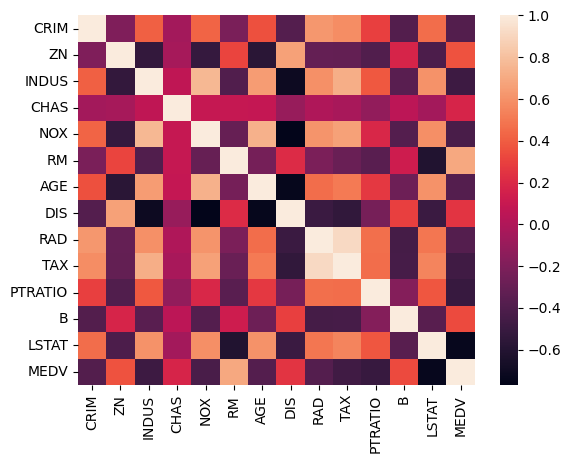

In [11]:
import seaborn as sns
sns.heatmap(data.corr(method='pearson'))

- Many of the attributes have a strong correlation.

## Data Visualizations

### Unimodal Data Visualizations

- Let us look at the histograms of each attribute to get an idea of the distribution.

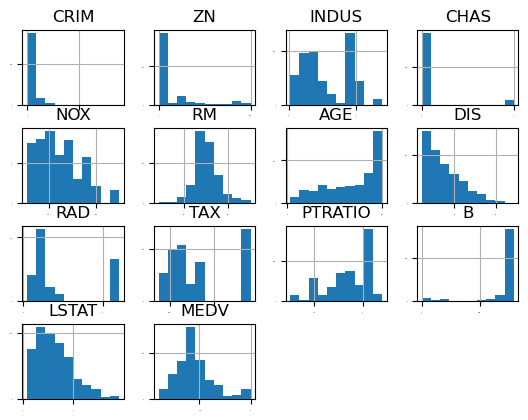

In [12]:
data.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1)
plt.show()

- We can see that 'RAD' and 'TAX' columns have a bimodal distribution.
- The attributes 'B', 'CRIM', 'ZN', and 'AGE' have an exponential distribution.

### Density Plots

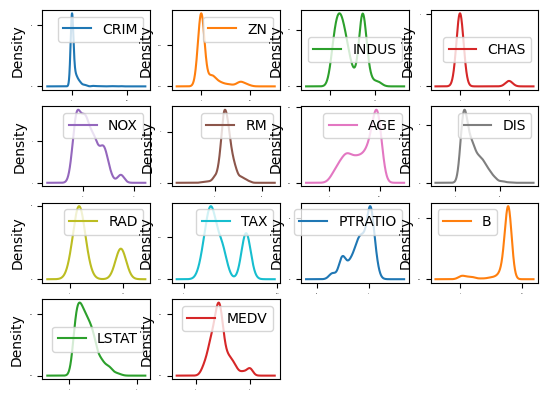

In [16]:
data.plot(kind='density', subplots = True, layout = (4, 4), sharex = False, legend = True, fontsize = 1)
plt.show()

- The Density Plots confirm our suspicions about 'RAD', 'TAX', 'B', 'CRIM', 'ZN', and 'AGE'.
- We can also see that the attributes 'NOX', 'RM', and 'LSTAT' maybe skewed Gaussian Distribution.

### Box and Whisker Plots

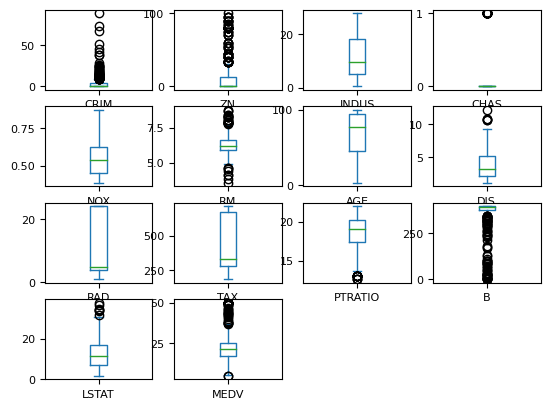

In [17]:
data.plot(kind = 'box', subplots = True, layout=(4, 4), sharex = False, sharey = False, fontsize = 8)
plt.show()

- This helps us find out the skew in many distributions so much so that our data looks like outliers.

### Multimodal Data Visualizations

### Scatter Matrix

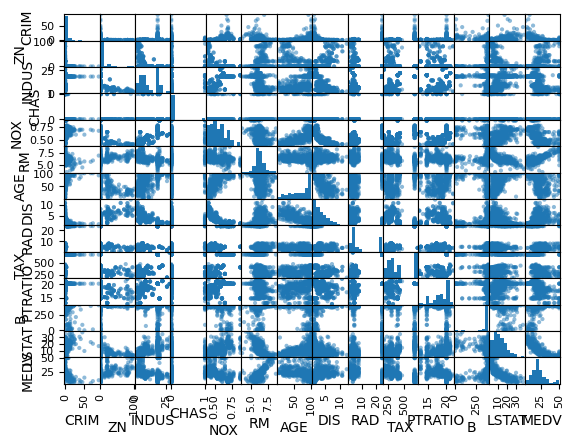

In [18]:
scatter_matrix(data)
plt.show()

### Heat Map

<AxesSubplot:>

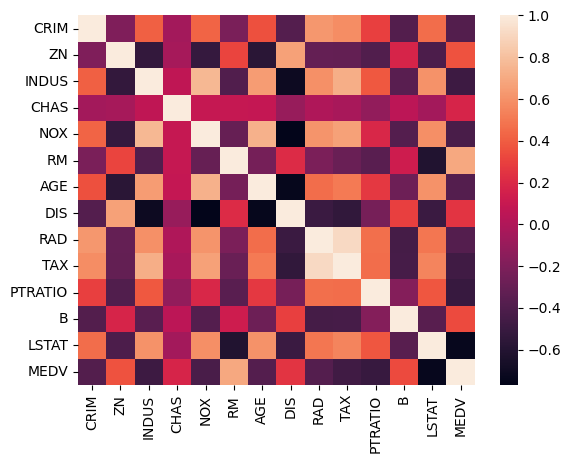

In [19]:
sns.heatmap(data.corr(method='pearson'))

- Strongly correlated features (white and black) need to be removed to improve the accuracy of the model.

## Summary of Idea from EDA
- Feature Selection needs to be done to remove the highly correlated attributes(positive and negative).
- Data should be normalized to reduce the effects of differing scales.
- Standardize the data to reduce the effects of differing distributions.

## Validation Dataset

In [20]:
X = data.drop('MEDV', axis = 1).values
y = data['MEDV'].values
test_size = 0.20
seed = 42
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = test_size, random_state = 42)

## Evaluating Algorithms

In [21]:
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error'

## Pipelines and Standardization

In [23]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLasso', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))

In [37]:
results = []
names = []

In [38]:
for name, model in pipelines:
    kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}, {cv_results.mean()}, {cv_results.std()}"
    print(msg)

ScaledLR, -23.614630404427214, 9.423917143858182
ScaledLasso, -29.304257678337326, 12.350152941852363
ScaledEN, -30.70316891733932, 14.463587829910896
ScaledKNN, -24.727326853658532, 11.323453521408696
ScaledCART, -28.747090243902438, 16.79925504105414
ScaledSVR, -31.755001243926568, 12.821161116206325


- We see that the KNN algorithm has the lowest mean squared value.
- Now let us visualize the distribution of the results of the algorithms using boxplots.

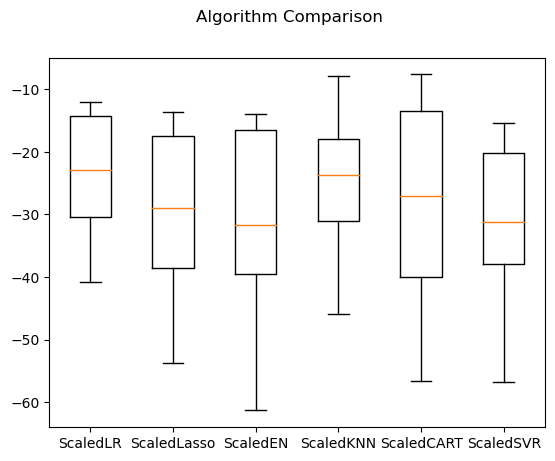

In [39]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Hyperparameter Tuning

In [40]:
import numpy as np
scaler = StandardScaler()
rescaled_X = scaler.fit_transform(X_train)
k_values = np.arange(1, 31)
param_grid = dict(n_neighbors = k_values)
knn = KNeighborsRegressor()
kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)
grid = GridSearchCV(estimator = knn, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaled_X, y_train)

In [41]:
print(f"Grid search:\nBest Score: {grid_result.best_score_}\nBest Params: {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print(mean, std, param)

Grid search:
Best Score: -17.376141463414633
Best Params: {'n_neighbors': 2}
-20.256879878048775 7.98906447974286 {'n_neighbors': 1}
-17.376141463414633 7.503238058803746 {'n_neighbors': 2}
-18.92805426829268 7.170079752301734 {'n_neighbors': 3}
-23.121509375 9.812953074290036 {'n_neighbors': 4}
-24.802264975609756 11.329157674746396 {'n_neighbors': 5}
-25.28146759823848 11.660671206954524 {'n_neighbors': 6}
-25.159793765555 10.68838831528139 {'n_neighbors': 7}
-25.673801505335366 10.087442597056523 {'n_neighbors': 8}
-25.500673456790118 10.183960867952527 {'n_neighbors': 9}
-24.67510621341463 9.609283506869069 {'n_neighbors': 10}
-24.508548165692396 9.458259449505901 {'n_neighbors': 11}
-24.416149686653114 10.119376619563509 {'n_neighbors': 12}
-24.369534066964924 9.767406093563118 {'n_neighbors': 13}
-24.541396052140364 9.662860764985476 {'n_neighbors': 14}
-24.884157956639562 10.003834405236047 {'n_neighbors': 15}
-25.080756152343746 10.273113297273396 {'n_neighbors': 16}
-25.350755

## Ensemble Methods

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}, {cv_results.mean()}, {cv_results.std()}"
    print(msg)

ScaledAB, -17.348331567647257, 7.981321810565563
ScaledGBM, -12.225525982498798, 6.079846347712208
ScaledRF, -13.725387378841452, 6.055970911094596
ScaledET, -11.420822436158534, 4.216034015056342


- Using ensemble method we found out that the GBM algorithm worked the best.
- Let us visualize these results using box plots.

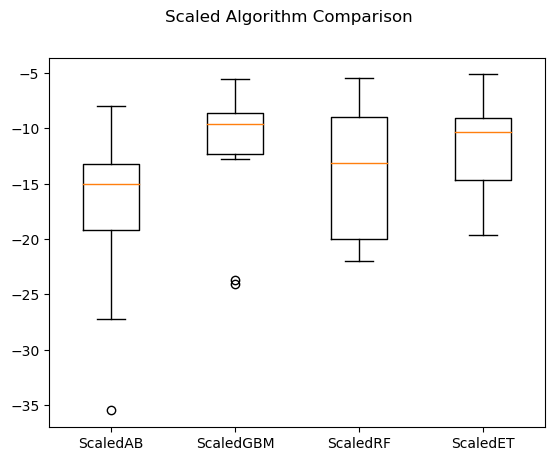

In [45]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- The GBM algorithm has the lowest score and the tightest distribution.

## Tune Ensemble Method

In [47]:
scaler = StandardScaler()
rescaled_X = scaler.fit_transform(X_train)
estimators = np.arange(50, 501, 50)
param_grid = dict(n_estimators = estimators)
gbm = GradientBoostingRegressor(random_state = seed)
kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)
grid = GridSearchCV(estimator=gbm, param_grid = param_grid, cv = kfold, scoring = scoring)
grid_result = grid.fit(rescaled_X, y_train)

In [48]:
print(f"Grid Search:\nBest Score: {grid_result.best_score_}\nBest Params:{grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print(mean, std, param)

Grid Search:
Best Score: -12.171671083292093
Best Params:{'n_estimators': 350}
-12.917913815580112 5.92668239447118 {'n_estimators': 50}
-12.30225156156926 6.032917455270746 {'n_estimators': 100}
-12.20906528686507 6.1775990142572725 {'n_estimators': 150}
-12.185066749536478 6.2954412899262415 {'n_estimators': 200}
-12.18281634579328 6.330844969771469 {'n_estimators': 250}
-12.19204567930876 6.393242190572806 {'n_estimators': 300}
-12.171671083292093 6.378157358063145 {'n_estimators': 350}
-12.211985251947551 6.330913673942696 {'n_estimators': 400}
-12.238335938822066 6.309579975897205 {'n_estimators': 450}
-12.247362072005128 6.289386912683404 {'n_estimators': 500}


## Finalize Model

In [49]:
scaler = StandardScaler()
rescaled_X = scaler.fit_transform(X_train)
model = GradientBoostingRegressor(random_state = seed, n_estimators = 350)
model.fit(rescaled_X, y_train)

GradientBoostingRegressor(n_estimators=350, random_state=42)

In [51]:
rescaled_validation_X = scaler.transform(X_validation)
predictions = model.predict(rescaled_validation_X)
print(mean_squared_error(y_validation, predictions))

6.072203416953645


## Conclusions
- We have found the GradientBoostingRegressor to be ideal for our dataset.
- We have reduced the mean squared error from 12 to 6.